# Detección de bordes usando cruces por cero de LoG

En una imagen la detección de bordes se puede realizar utilizando cruces por cero de la imagen filtrada por un Laplaciano de Gauss. Este tipo de filtro permite realzar ciertas características de la imagen que nos permitirán llevar a cabo esta tarea

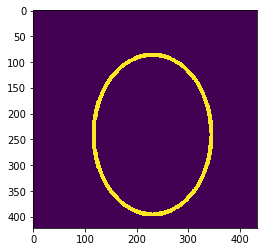

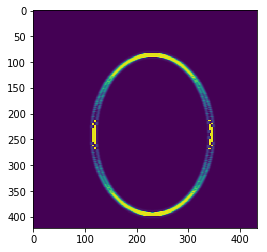

In [2]:
import scipy as sp #librería de señales
import numpy as np #librería numérica
import matplotlib.pyplot as plt #librería de graficación
import cv2
from sympy import *
import scipy.ndimage as nd
from sympy import * 
import math

nuevaImagen = []
imagen  = cv2.imread('circulo.png',0) # cargamos una imagen de muestra que se encuentra en la librería scipy
plt.imshow(imagen) #visualización de la imagen
plt.show()
LoG = nd.gaussian_laplace(imagen, 2) #aplicación del filtro Laplaciano de Gauss a la imagen de muestra
plt.imshow(LoG) #visualizamos la imagen filtrada
plt.show()

** Actividad 1**

Esta actividad se debe realizar por regiones de la imagen, es decir, no se toma la imagen completa sino que se trabaja por segmentos de filas o columnas de acuerdo a tu consideración.

Para cada segmento de la imagen filtrada encuentra un polinomio interpolador (debes encontrar la ecuación del polinomio) y con alguno de los métodos de solución de ecuaciones determina el cruce por cero de ese polinomio. Crea una imagen totalmente negra de las mismas dimensiones de la imagen que estás trabajando y en el valor de $x$ donde se detecte el cruce por cero asigna un valor de 255 (blanco), de esta forma en la nueva imagen se deben ver los bordes de la imagen filtrada.

In [3]:
#Imagen negra para dibujar borde
img = np.zeros(imagen.shape, np.uint8)
cv2.imshow('imagen',img)
cv2.waitKey(0) #si no se pone se congela y bloque la ventana
cv2.destroyAllWindows() #idem

In [4]:
def metodoLagrange(datos):
    pixel = 0
    grado = len(datos)
    x = Symbol('x')
    for k in range(grado):
        
       
            productoria = 1
            
            for i in range(grado):
                if (i != k) and i != (x-1):
                    productoria *= ((x) - (i+1))/((k+1) - (i+1))
                   # print(i , k )
                    
            productoria = productoria * datos[k]        
            pixel += productoria

    return pixel

y =[100, 109, 118, 119, 121, 94, 37, 51, 68, 80, 80, 64, 68, 69, 66]
#y =[55, 54, 54, 54, 54, 54, 60, 68, 63, 114, 166, 208, 242, 254, 253]
y = [0, 255, 255, 255, 255, 255, 255, 255]

print(metodoLagrange(y))


255*(-x + 3)*(-x/2 + 2)*(-x/3 + 5/3)*(-x/4 + 3/2)*(-x/5 + 7/5)*(-x/6 + 4/3)*(x - 1) + 255*(-x + 4)*(-x/2 + 5/2)*(-x/3 + 2)*(-x/4 + 7/4)*(-x/5 + 8/5)*(x/2 - 1/2)*(x - 2) + 255*(-x + 5)*(-x/2 + 3)*(-x/3 + 7/3)*(-x/4 + 2)*(x/3 - 1/3)*(x/2 - 1)*(x - 3) + 255*(-x + 6)*(-x/2 + 7/2)*(-x/3 + 8/3)*(x/4 - 1/4)*(x/3 - 2/3)*(x/2 - 3/2)*(x - 4) + 255*(-x + 7)*(-x/2 + 4)*(x/5 - 1/5)*(x/4 - 1/2)*(x/3 - 1)*(x/2 - 2)*(x - 5) + 255*(-x + 8)*(x/6 - 1/6)*(x/5 - 2/5)*(x/4 - 3/4)*(x/3 - 4/3)*(x/2 - 5/2)*(x - 6) + 255*(x/7 - 1/7)*(x/6 - 1/3)*(x/5 - 3/5)*(x/4 - 1)*(x/3 - 5/3)*(x/2 - 3)*(x - 7)


In [104]:
y = [0, 255, 255, 255, 255, 255, 255, 255]
funcion = metodoLagrange(y)
print(funcion)
busquedaIncremental(str(funcion), 0,1)

255*(-x + 3)*(-x/2 + 2)*(-x/3 + 5/3)*(-x/4 + 3/2)*(-x/5 + 7/5)*(-x/6 + 4/3)*(x - 1) + 255*(-x + 4)*(-x/2 + 5/2)*(-x/3 + 2)*(-x/4 + 7/4)*(-x/5 + 8/5)*(x/2 - 1/2)*(x - 2) + 255*(-x + 5)*(-x/2 + 3)*(-x/3 + 7/3)*(-x/4 + 2)*(x/3 - 1/3)*(x/2 - 1)*(x - 3) + 255*(-x + 6)*(-x/2 + 7/2)*(-x/3 + 8/3)*(x/4 - 1/4)*(x/3 - 2/3)*(x/2 - 3/2)*(x - 4) + 255*(-x + 7)*(-x/2 + 4)*(x/5 - 1/5)*(x/4 - 1/2)*(x/3 - 1)*(x/2 - 2)*(x - 5) + 255*(-x + 8)*(x/6 - 1/6)*(x/5 - 2/5)*(x/4 - 3/4)*(x/3 - 4/3)*(x/2 - 5/2)*(x - 6) + 255*(x/7 - 1/7)*(x/6 - 1/3)*(x/5 - 3/5)*(x/4 - 1)*(x/3 - 5/3)*(x/2 - 3)*(x - 7)


1

In [5]:
# Metodo de deteccion por cruces de busqueda Incremental
def busquedaIncremental(funcion,puntoInicial,incremento,error,iteraciones):
    fun = vars(math) 
    
    if abs(eval(funcion,fun,{'x': puntoInicial})) <= error:
        return puntoInicial #retorna el punto inicial si es solucion

    puntoNuevo = puntoInicial + incremento # calcula xn segun el metodo
    
    #itera si f(xi) y f(xn) tienen signos iguales o alcanza el maximo de iteraciones
    while eval(funcion,fun,{'x': puntoInicial})*eval(funcion,fun,{'x': puntoNuevo}) > 0 and iteraciones > 0:
        
        puntoInicial = puntoNuevo # aumenta el punto inicial
        puntoNuevo = puntoInicial + incremento # calcula xn segun el metodo
        
        iteraciones -= 1 # reduce en 1 el numero de iteraciones
    
    # mensaje si no enceuntra solucion en las x iteraciones
    if iteraciones == 0:
        return('no se encontro la raiz en el numero maximo de iteraciones')
    
    return puntoNuevo #retorna xn como solucion a f(x)

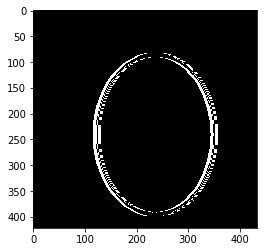

In [10]:

for i in range(imagen.shape[0]):
    for j in range(imagen.shape[1]):
        
        bloque = imagen[i,j:j+7]
        
        if sum(1 for i in bloque if i > 0) < 7  and sum(1 for i in bloque if i > 0) > 0 :
            #print(bloque, sum(1 for i in bloque if i > 0))
            
            funcion = metodoLagrange(bloque)
            indice = busquedaIncremental(str(funcion), 0,1)
            #print(bloque)
            #print(indice);
            j +=7
            nuevaImagen[i,j+indice]= 255
            
            
plt.imshow(nuevaImagen) #visualización de la imagen
plt.show()   
#plt.imshow(imagen) #visualización de la imagen
#plt.show() 

In [7]:
def busquedaIncremental(funcion,punto_inicial,incremento):
    
    fun = vars(math) #nos aseguramos que podamos utilizar funciones trigonométricas u otras funciones especiales
    umbral= 0.00001 #Definimos el umbral del error igual a 10^-5
    
    Fxi = eval(funcion,fun,{'x':punto_inicial}) #Valor de la función ingresada en el punto inicial recien ingresado 

# Si en primera instancia el valor de la funcion evaluada en el punto inicial es menor al umbral
# entonces se toma este punto como el valor de la raiz y se retorna 
    if(abs(Fxi) <= umbral):
        raiz = punto_inicial
        return raiz

#Como el punto inicial no fué la raíz entonces se le suma el incremento para volver a realizar la evaluación
    
    punto_nuevo = punto_inicial + incremento

#Se establece un contador para establecer un limite de iteraciones iniciado en cero 
    cont = 0
    # Se calcula que la multiplicación de la funcion evaluada en el punto nuevo por la misma en el punto inicial sea mayor a cero 
    # esto significa que los resultados fueron positivos indicando que las funciones evaluadas no se han pasado de la raiz 
    # además de que las iteraciones sean menor a las establecidas en el contador.
    while(eval(funcion,fun,{'x':punto_nuevo}) * eval(funcion,fun,{'x':punto_inicial}) > 0 and cont <= 30):
            punto_inicial= punto_nuevo
            punto_nuevo = punto_inicial + incremento
            cont= cont + 1
    # se reemplaza el punto incial por el nuevo y al nuevo le acemos el incremento establecido par ser evaluado en el proximo ciclo 

    if(cont == 30):
    #se vuelve a realizar la evaluacion de la función en el punto nuevo si es menor que el umbral pero esta vez en valor absoluto
    # esto por si depronto el resultado se paso un poco de la raiz pero de todas maneras se puede tomar como valor de la raiz y se 
    # retorna en caso de ser verdadero el resultado 

        return -99999999999
    
    return punto_nuevo

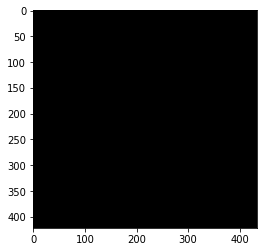

(422, 434)
(422, 434, 3)


In [9]:
nuevaImagen = np.zeros((imagen.shape[0],imagen.shape[1],3), np.uint8) #crea una imagen negra
plt.imshow(nuevaImagen) #visualización de la imagen
plt.show()
print(imagen.shape)
print(nuevaImagen.shape)